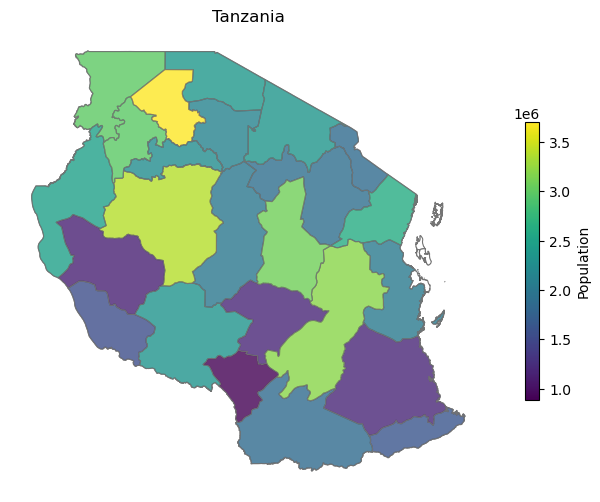

In [30]:
import pandas as pd

import pandas as pd   
import geopandas as gpd
import fiona
import shapely
import pyogrio
import matplotlib.pyplot as plt



# Loading the data needed
# Load population data (ensure it has columns: 'shapeName' and 'population')
population = pd.read_csv("Maps/TZAmap_population.csv")
# Load districts map dataset
regions = gpd.read_file("Maps/TZAmap_regions.shp")
population.rename(columns={"area_name": "shapeName"}, inplace=True)


# Merge population data with the region shapefile
reg_pop = regions.merge(population, on="shapeName", how="left")


# generating the chart
# Create a figure and axis for a single plot
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the region map
reg_pop.plot(ax = ax,  edgecolor="#747474", linewidth=0.8,color = "white")

# Plot the regions with population-based color
reg_pop.plot(ax=ax, edgecolor="#747474", linewidth=0.8, column="Population Size-Total", 
          cmap="viridis", legend=True, alpha=0.8,  legend_kwds={
                 "shrink": 0.6,  # Shrink the legend size
                 "label": "Population",  # Legend title
                 "orientation": "vertical",  # Can also be 'horizontal'
                 
             })

# label graph
plt.title("Tanzania")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# removing the axis 
plt.axis("off")

plt.savefig("Tanzania_map.png", dpi=300, bbox_inches="tight")

plt.show()

30


In [25]:
reg_pop.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,Population Size-Total
0,Kilimanjaro,TZ-09,36957248B55328686942733,TZA,ADM1,"POLYGON ((37.97322 -4.58595, 37.95057 -4.5618,...",1861934.0
1,Mara,TZ-13,36957248B94562559517692,TZA,ADM1,"POLYGON ((35.22448 -2.4975, 34.94249 -2.50992,...",2372015.0
2,Manyara,TZ-26,36957248B99133684808243,TZA,ADM1,"POLYGON ((37.10873 -3.47107, 37.13184 -3.46494...",1892502.0
3,Arusha,TZ-01,36957248B12876867554617,TZA,ADM1,"POLYGON ((37.40454 -2.89704, 37.38876 -2.91099...",2356255.0
4,Kagera,TZ-05,36957248B48065738140082,TZA,ADM1,"POLYGON ((32.75025 -1, 32.74476 -1.46219, 31.8...",2989299.0


In [12]:
print(len(population["area_name"].unique()))

34
